#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [1]:
import matplotlib.pyplot as plt

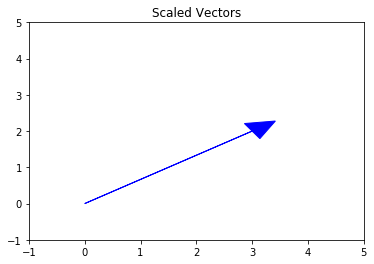

In [2]:
# Start with a simple vector
a = [3, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, a[0], a[1],head_width=.5, head_length=.5, color ='blue')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Scaled Vectors")
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
import numpy as np

In [4]:
a = np.array([17, -4, -2, 1])
a
np.linalg.norm(a)

17.606816861659009

In [5]:
import math

In [6]:
math.sqrt(17**2 + -4**2 + -2**2 + 1**2)

16.431676725154983

In [7]:
(17**2 + -4**2 + -2**2 + 1**2)**.5

16.431676725154983

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [8]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

In [9]:
np.dot(c,d)

42

These vectors are not orthogonal because their dot product is not equal to 0.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [10]:
e = np.array([[7,4,2], [1,3,-1], [2,6,-4]])
e

array([[ 7,  4,  2],
       [ 1,  3, -1],
       [ 2,  6, -4]])

In [11]:
np.linalg.inv(e)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [12]:
e.T

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [13]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [14]:
##### Your Code Here #####
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [15]:
df.var()

customers    98761.904762
snow             8.571429
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

Variances are not comparable based upon the inherent differences associated with squaring their respective variables.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [16]:
np.cov(np.array(df))

array([[  336200. ,   311190. ,   509630. ,   405490. ,   442800. ,
          592040. ,   654360. ],
       [  311190. ,   288040.5,   471718.5,   375325.5,   409860. ,
          547998. ,   605682. ],
       [  509630. ,   471718.5,   772524.5,   614663.5,   671220. ,
          897446. ,   991914. ],
       [  405490. ,   375325.5,   614663.5,   489060.5,   534060. ,
          714058. ,   789222. ],
       [  442800. ,   409860. ,   671220. ,   534060. ,   583200. ,
          779760. ,   861840. ],
       [  592040. ,   547998. ,   897446. ,   714058. ,   779760. ,
         1042568. ,  1152312. ],
       [  654360. ,   605682. ,   991914. ,   789222. ,   861840. ,
         1152312. ,  1273608. ]])

In [17]:
df.values.T.reshape(2,7)*df.values.reshape(2,7)

array([[ 672400,       0,  950000,     990, 1350000,   10150, 1584000],
       [      0,    1080,       0,    1450,       0,    9600,      16]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [27]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [67]:
##### Your Code Here #####

"""
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
# define a matrix
X = array([[1, 2], [3, 4], [5, 6]])
print("Data: \n", X)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(X)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(X)
print("\n Projected Data: \n", B)
"""

'\n# Principal Component Analysis\nfrom numpy import array\nfrom sklearn.decomposition import PCA\n# define a matrix\nX = array([[1, 2], [3, 4], [5, 6]])\nprint("Data: \n", X)\n# create the PCA instance\npca = PCA(2)\n# fit on data\npca.fit(X)\n# access values and vectors\nprint("\n Eigenvectors: \n", pca.components_)\nprint("\n Eigenvalues: \n",pca.explained_variance_)\n# transform data\nB = pca.transform(X)\nprint("\n Projected Data: \n", B)\n'

In [28]:
#df = df.drop(columns='Country')
df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [29]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [30]:
df = np.array(df.copy())

In [33]:
# calculate the mean of each column
means = mean(X.T, axis=1)
print("\n Means: \n", means)


 Means: 
 [   94.25   245.25   706.     130.5    205.25   154.25   798.25   208.
   457.75   202.     349.     967.5   1502.5     57.5   1427.     360.75
    55.25]


In [34]:
# center columns by subtracting column means
centered_data = df - means
print("\n Centered Data: \n", centered_data)
# calculate covariance matrix of centered matrix
# We're not going to find the covaraicne matrix by the (Z^T)(Z) method, I trust this function more
covariance_matrix = cov(centered_data.T)


 Centered Data: 
 [[  1.07500000e+01  -2.50000000e-01  -2.10000000e+01   1.65000000e+01
   -1.22500000e+01   1.75000000e+00  -7.82500000e+01   4.50000000e+01
    3.02500000e+01  -4.00000000e+00   1.10000000e+01   1.34500000e+02
   -3.05000000e+01  -5.00000000e-01  -5.30000000e+01   1.42500000e+01
   -1.25000000e+00]
 [  8.75000000e+00  -1.82500000e+01   9.70000000e+01   2.95000000e+01
    2.97500000e+01   2.07500000e+01   7.57500000e+01   5.70000000e+01
    1.12250000e+02   1.00000000e+00   1.60000000e+01   1.69500000e+02
    7.95000000e+01   1.55000000e+01  -1.71000000e+02   1.14250000e+02
    8.75000000e+00]
 [  8.75000000e+00  -3.25000000e+00   4.40000000e+01  -8.50000000e+00
   -2.12500000e+01  -7.25000000e+00  -2.32250000e+02  -3.70000000e+01
   -3.97500000e+01   1.80000000e+01  -1.20000000e+01  -1.05000000e+01
   -4.05000000e+01  -4.50000000e+00   1.45000000e+02   9.72500000e+01
    6.75000000e+00]
 [ -2.82500000e+01   2.17500000e+01  -1.20000000e+02  -3.75000000e+01
    3.75000

In [35]:
# We're not going to find the covaraicne matrix by the (Z^T)(Z) method, I trust this function more
covariance_matrix = cov(centered_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)


 Covariance Matrix: 
 [[  3.55583333e+02  -2.68416667e+02   1.46600000e+03   4.73500000e+02
   -5.44166667e+01   1.89250000e+02  -2.94741667e+03   8.31666667e+02
    1.28741667e+03   1.82333333e+02   1.92333333e+02   3.70950000e+03
    8.45000000e+01   1.29166667e+02  -1.00966667e+03   2.79375000e+03
    1.74916667e+02]
 [ -2.68416667e+02   2.72250000e+02  -1.50600000e+03  -4.43500000e+02
   -1.29750000e+02  -2.29083333e+02   1.49925000e+03  -7.81666667e+02
   -1.38725000e+03  -1.34000000e+02  -1.94000000e+02  -3.15883333e+03
   -4.98833333e+02  -1.65500000e+02   1.46033333e+03  -2.43825000e+03
   -1.63750000e+02]
 [  1.46600000e+03  -1.50600000e+03   8.72866667e+03   2.21366667e+03
    5.86000000e+02   1.16233333e+03  -9.79933333e+03   3.58533333e+03
    6.94466667e+03   9.24333333e+02   8.64333333e+02   1.61250000e+04
    2.53000000e+03   8.58666667e+02  -6.19133333e+03   1.40506667e+04
    9.60666667e+02]
 [  4.73500000e+02  -4.43500000e+02   2.21366667e+03   8.73666667e+02
    2.3

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [38]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA

# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(df)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(df)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[-0.05695538  0.04792763 -0.25891666 -0.08441498 -0.00519362 -0.03762098
   0.40140206 -0.15184994 -0.24359373 -0.02688623 -0.03648827 -0.6326409
  -0.04770286 -0.02618776  0.23224414 -0.46396817 -0.0296502 ]
 [ 0.01601285  0.01391582 -0.01533114 -0.05075495 -0.09538866 -0.0430217
  -0.71501708 -0.14490027 -0.22545092  0.04285076 -0.0454518  -0.17774074
  -0.21259968 -0.03056054  0.55512431  0.11353652  0.00594992]]

 Eigenvalues: 
 [ 105073.34576714   45261.62487597]

 Projected Data: 
 [[-144.99315218   -2.53299944]
 [-240.52914764 -224.64692488]
 [ -91.869339    286.08178613]
 [ 477.39163882  -58.90186182]]


In [48]:
print(B.shape)
B

(4, 2)


array([[-144.99315218,   -2.53299944],
       [-240.52914764, -224.64692488],
       [ -91.869339  ,  286.08178613],
       [ 477.39163882,  -58.90186182]])

In [51]:
B = pd.DataFrame(B)

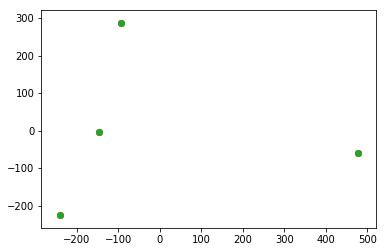

In [59]:
plt.scatter(B[0],B[1])
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [99]:
#df = pd.DataFrame(df)

In [100]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [101]:
def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)

In [102]:
##### Your Code Here #####
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(points)
labels = kmeans.labels_

new_series = pd.Series(labels)


In [103]:
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,1
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,1
4,-0.804026,-9.704457,1


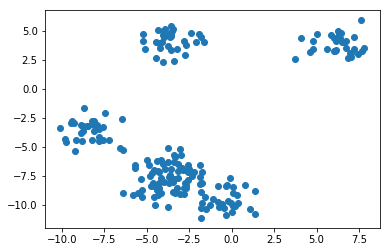

In [104]:
# Scatter plot of our label-less data
plt.scatter(points.x, points.y)
plt.show()

In [105]:
import math
import numpy as np
from scipy.spatial import distance

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(points, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [106]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

In [107]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

NameError: name 'first_pass' is not defined

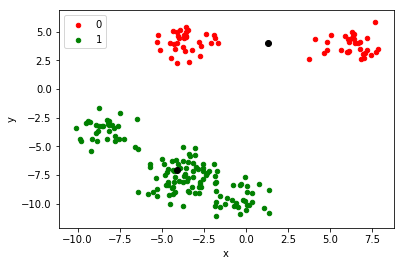

In [108]:
# We might get unlucky with different centroids and have slightly different clusters.
centroids = get_centroids(points, 'clusters')
plot_clusters(points, 'clusters', centroids)